In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('final.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345405 entries, 0 to 345404
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          345405 non-null  float64
 1   manufacturer  345405 non-null  float64
 2   condition     345405 non-null  float64
 3   cylinders     345405 non-null  float64
 4   fuel          345405 non-null  float64
 5   odometer      345405 non-null  float64
 6   title_status  345405 non-null  float64
 7   transmission  345405 non-null  float64
 8   drive         345405 non-null  float64
 9   size          345405 non-null  float64
 10  type          345405 non-null  float64
 11  paint_color   345405 non-null  float64
 12  state         345405 non-null  float64
 13  price         345405 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 36.9 MB


In [5]:
df.head(10)

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,24.0,29.0,0.000000,4.000000,2.0,284000.0,0.0,0.0,2.000000,2.000000,0.000000,9.000000,4.0,4000
1,21.0,6.0,2.000000,6.000000,2.0,284000.0,0.0,0.0,1.000000,1.194993,5.000000,1.000000,40.0,2400
2,21.0,8.0,1.291587,5.891416,0.0,284000.0,0.0,0.0,0.726873,1.000000,0.000000,10.000000,38.0,8900
3,10.0,8.0,2.000000,5.891416,2.0,284000.0,0.0,0.0,0.726873,1.194993,5.385383,5.612094,14.0,7988
4,10.0,8.0,1.291587,5.891416,2.0,284000.0,0.0,0.0,0.726873,1.194993,5.385383,5.612094,48.0,7988
5,30.0,29.0,2.000000,4.000000,2.0,284000.0,0.0,0.0,0.726873,1.194993,5.385383,5.612094,3.0,1500
6,21.0,8.0,1.291587,5.891416,0.0,284000.0,0.0,0.0,0.726873,1.000000,0.000000,10.000000,38.0,8900
7,17.0,5.0,1.000000,8.000000,2.0,284000.0,0.0,0.0,0.000000,1.000000,9.000000,10.000000,37.0,4800
8,21.0,8.0,1.291587,10.000000,2.0,284000.0,0.0,0.0,2.000000,1.194993,5.385383,5.612094,26.0,4995
9,17.0,8.0,2.000000,8.000000,0.0,284000.0,0.0,0.0,0.000000,1.000000,7.000000,2.000000,13.0,8300


In [7]:
corr = df.corr()

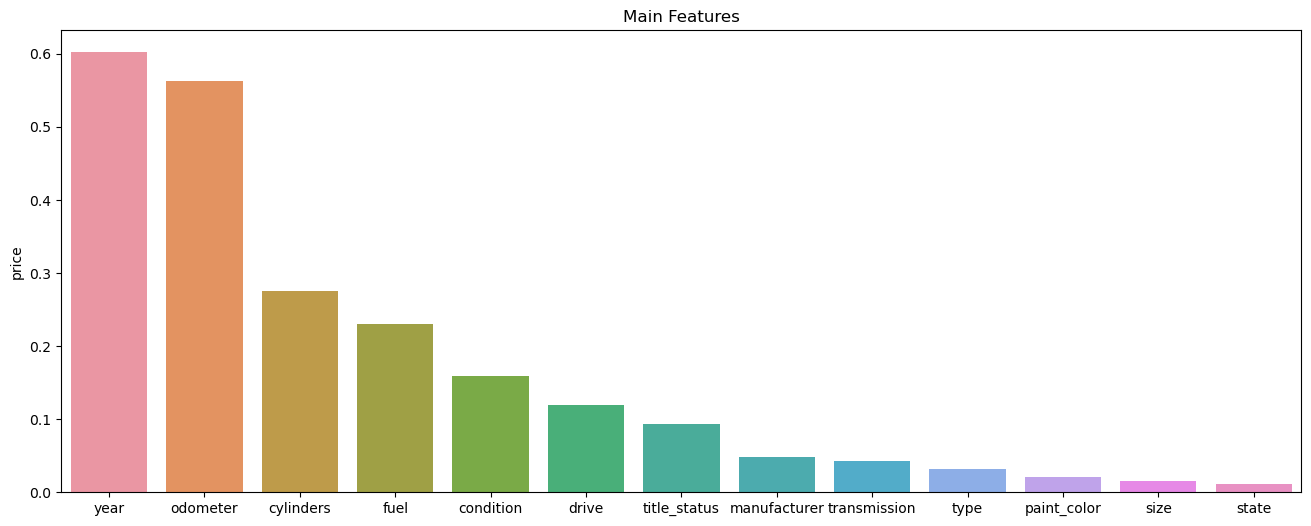

In [8]:
plt.figure(figsize=(16, 6))

Main_features = ['year', 'odometer', 'cylinders', 'fuel', 'condition', 'drive','title_status', 'manufacturer', 'transmission', 'type', 'paint_color','size', 'state']
sns.barplot(x=Main_features, y=np.abs(corr['price'])[Main_features])
plt.title('Main Features')
plt.show()

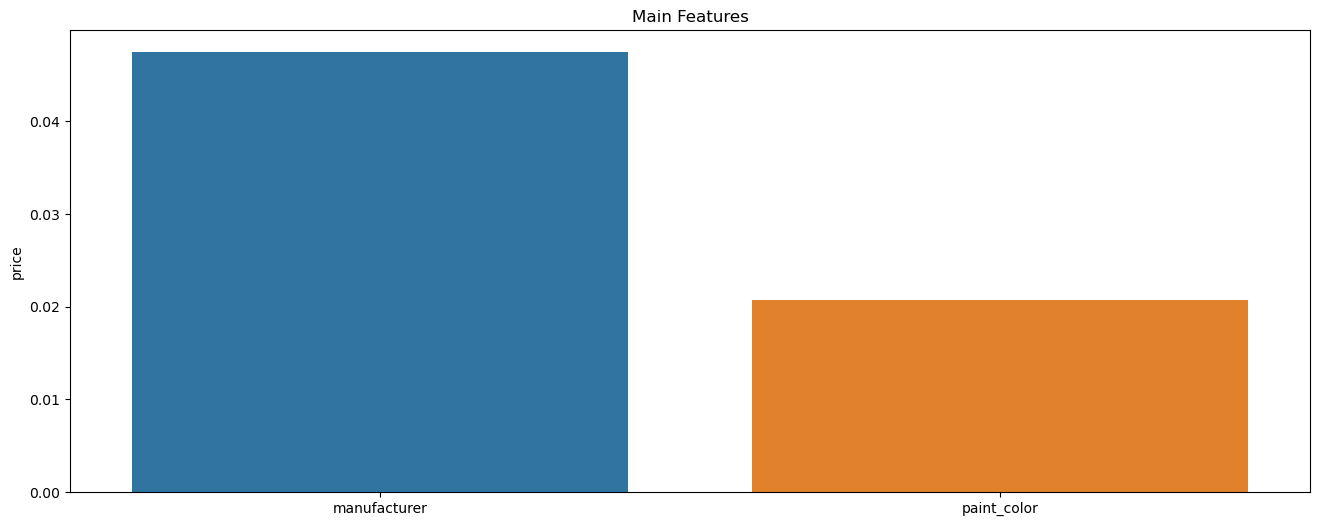

In [9]:
plt.figure(figsize=(16, 6))

Main_features = ['manufacturer','paint_color']
sns.barplot(x=Main_features, y=np.abs(corr['price'])[Main_features])
plt.title('Main Features')
plt.show()

KeyError: 'model'

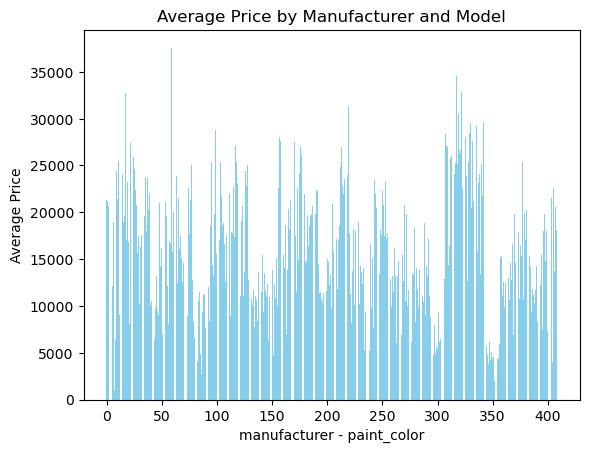

In [10]:
# Group by model and manufacturer, and calculate the average price
grouped_data = df.groupby(['manufacturer', 'paint_color']).mean()['price'].reset_index()

# Plotting
#plt.figure(figsize=(14, 8))
plt.bar(range(len(grouped_data)), grouped_data['price'], color='skyblue')
plt.xlabel('manufacturer - paint_color')
plt.ylabel('Average Price')
plt.title('Average Price by Manufacturer and Model')
plt.xticks(range(len(grouped_data)), [f"{manufacturer} - {paint_color}" for manufacturer, model in zip(grouped_data['manufacturer'], grouped_data['model'])], rotation=90)
plt.tight_layout()
plt.show()